## sklearn.cluster.AgglomerativeClustering

- 使用single-link确实会造成一定的链式效应，而使用complete-link则完全不会产生这种现象，使用average-link和ward-link则介于两者之间。

> https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

---

- linkage：{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’：聚类的合并方式
- distance_threshold：float, default=None ：聚类合并的阈值，该选项与聚类数目二选一

<!-- ![](https://pic3.zhimg.com/80/v2-26d260f8cad14d0af66928e34fa8b68e_720w.jpg) -->

4
------------------------------
[[  0 400]
 [  1 100]
 [  2 401]
 [  3  99]]


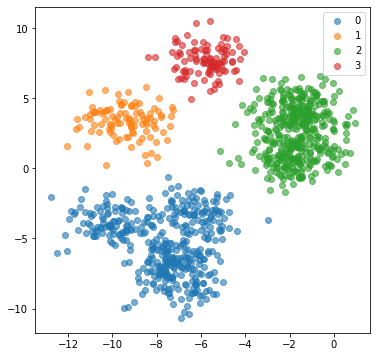

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

mod = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
print(mod.n_clusters_) # 簇的个数
print('-'*30)
# print(mod.labels_) # 聚类结果
print(np.asarray(np.unique(mod.labels_, return_counts=True)).T) # 统计每个聚类的点数


res = np.column_stack([X, mod.labels_])

fig, ax = plt.subplots(figsize=(6, 6))
for j in range(mod.n_clusters):
    ind = res[:, 2] == j
    ax.scatter(res[ind, 0], res[ind, 1], label=j, alpha=0.6)
ax.legend(loc='best')
plt.show()

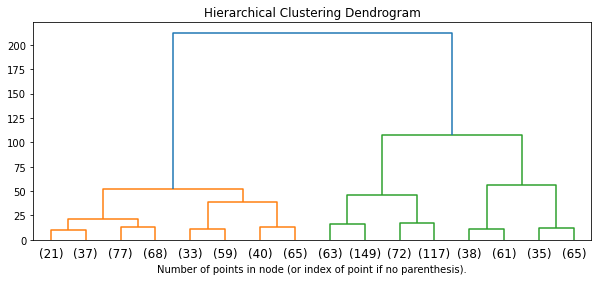

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) # 对每个非叶节点统计孩子数
    n_samples = len(model.labels_) # 叶子节点数
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples: # 孩子为叶子节点
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples] # 孩子为非叶节点
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float) # 生成Z矩阵

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs) # 打印


seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X) # 阈值设为0，每个样本单独成为聚类，保证生成整棵树

fig, ax = plt.subplots(figsize=(10, 4))
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=3) # 打印前p个层次

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

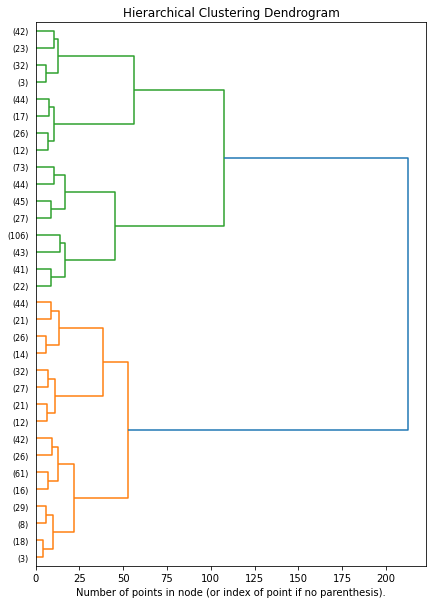

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) # 对每个非叶节点统计孩子数
    n_samples = len(model.labels_) # 叶子节点数
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples: # 孩子为叶子节点
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples] # 孩子为非叶节点
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float) # 生成Z矩阵

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs) # 打印


seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X) # 阈值设为0，每个样本单独成为聚类，保证生成整棵树

fig, ax = plt.subplots(figsize=(7, 10))
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=4, orientation='right') # 打印前p个层次

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## $\bigstar$聚类图 scipy.cluster.hierarchy.dendrogram

- p: int, optional 截断参数
- truncate_mode: str, optional 截断方式：'level'限制展示p层，'lastp'最大的p个连接
- orientation： str, optional 图的方向： 'top', 'bottom', 'left', 'right'
- labels: ndarray, optional 样本的标签，可以在图中显示

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

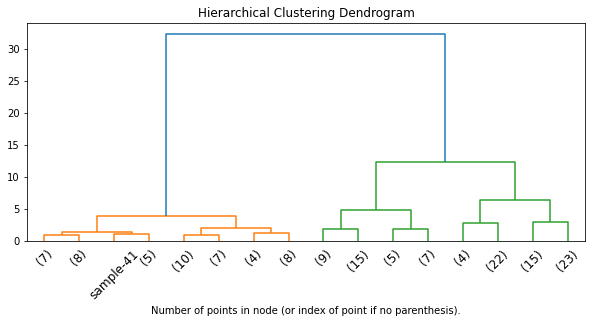

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) # 对每个非叶节点统计孩子数
    n_samples = len(model.labels_) # 叶子节点数
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples: # 孩子为叶子节点
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples] # 孩子为非叶节点
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float) # 生成Z矩阵

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs) # 打印


X = load_iris().data

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X) # 阈值设为0，每个样本单独成为聚类，保证生成整棵树

fig, ax = plt.subplots(figsize=(10, 4))
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=3, labels=[f'sample-{i}' for i in range(X.shape[0])]) # 打印前p个层次
# plot_dendrogram(model, truncate_mode="level", p=3) # 打印前p个层次

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=45) # 让坐标轴文字倾斜
plt.show()

## 生成Z矩阵 scipy.cluster.hierarchy.linkage

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

![image-20220827232618082](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202208272326241.png)

[[2, 4], [8, 64], [0, 0], [4, 16], [1, 1], [9, 81], [9, 81], [0, 0]]


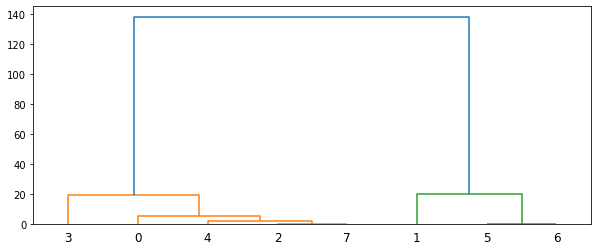

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = [[i, i**2] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
print(X)
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(10, 4))
dn = dendrogram(Z)

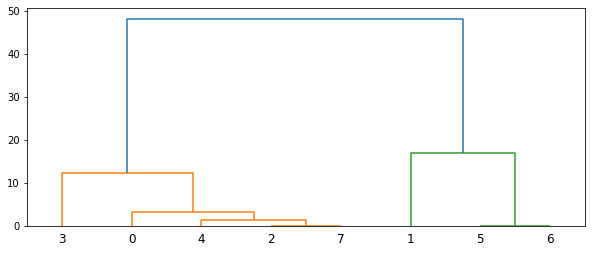

In [35]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(10, 4))
dn = dendrogram(Z)
plt.show()

## $\bigstar$聚类图如何解读（小样本）

> https://www.zhihu.com/question/298921068/answer/1591134202


- 首先，这棵树是从左向右横着生长的，最左侧罗列出所有聚类类别，像树的根系，可以说，你有多少聚类变量或个案，就有多少个根系类，根系类生长聚合，逐渐向右侧生长出若干枝干类，继续生长，最后合并为两类。也就是说，每一条横线，从根系开始就是一类，横线不断合并，类别也相应高度集中。

- 第二，图形的顶部有一行数字，它是这颗树的横轴，数字是**各类别的相对距离**，是按距离比例重新设定的结果。这个类的相对距离，能大概告诉我们类别之间距离的变化。

- 第三，读懂这颗树，你需要一把尺子，与从左向右的横线垂直90度放下。此时，横线（一条线就是一个类别）被尺子截断，这些端点的个数就是该相对距离下的类别数目。



如果我们是分成两类，请看右侧红线，“上海”独自成为一个类别，其他城市是第二个类别；如果我们想分成三类，那么这三类的情况是，“上海”独为一类，“天津、北京、广东、浙江”四个城市是第二类，第三类则包括剩余的其他城市。

再进一步，两条红线之间的距离，告诉我们聚为两类和三类，其**类中间距离发生了多大的变化**，我们可以尝试用这种**相对距离变化的幅度来初步判断聚类的效果**。有读者可能又要问了，到底聚为几个类别比较合适？那么我奉劝大家一句，不管是冰柱图还是树状图，它更多的是为我们充分展示聚类的整个过程，让我们从可视化的层面了解到哪些个案被归聚为一类，最终聚为几个类别，这需要你依据对不同类的**特征的区隔程度**来**讨论决定**。

![](https://picx.zhimg.com/80/v2-f566176031afb406b741e9acd6f996ef_720w.jpg?source=1940ef5c)